In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df = pd.read_csv('https://assets.datacamp.com/production/course_1939/datasets/house-votes-84.csv',names=cols)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
party                435 non-null object
infants              435 non-null object
water                435 non-null object
budget               435 non-null object
physician            435 non-null object
salvador             435 non-null object
religious            435 non-null object
satellite            435 non-null object
aid                  435 non-null object
missile              435 non-null object
immigration          435 non-null object
synfuels             435 non-null object
education            435 non-null object
superfund            435 non-null object
crime                435 non-null object
duty_free_exports    435 non-null object
eaa_rsa              435 non-null object
dtypes: object(17)
memory usage: 28.9+ KB


In [11]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [13]:
def check_frequency(column):
    count_y = sum(df[column] == 'y')
    count_n = sum(df[column] == 'n')
    if count_y >= count_n:
        return 'y'
    else:
        return 'n'

In [14]:
for i in cols:
    df[i] = df[i].replace('?', check_frequency(i))

In [15]:
df.describe()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
count,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435,435
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,248,243,264,258,227,283,253,257,229,223,285,264,234,265,261,373


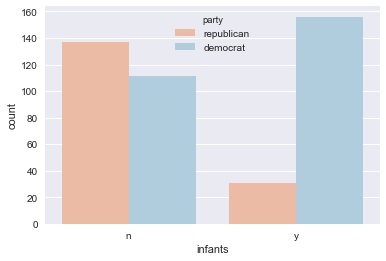

In [30]:
plt.figure()
sns.countplot(x='infants',hue='party',data=df,palette='RdBu')
plt.show()

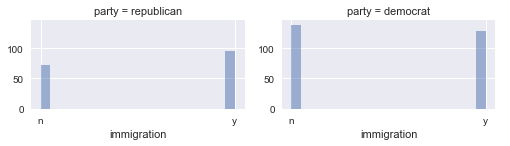

In [28]:
sns.set()
grid = sns.FacetGrid(data=df,col='party',size=2.2,aspect=1.6)
#grid.map(plt.hist,'infants',alpha=.5,bins=20)
grid.map(plt.hist,'immigration',alpha=.5,bins=20)
grid.add_legend()
plt.show()

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [48]:
y = df['party'].values
X = df.drop('party',axis=1)

In [54]:
X.values.flatten().reshape(X.shape)

array([['n', 'y', 'n', ..., 'y', 'n', 'y'],
       ['n', 'y', 'n', ..., 'y', 'n', 'y'],
       ['n', 'y', 'y', ..., 'y', 'n', 'n'],
       ..., 
       ['n', 'y', 'n', ..., 'y', 'n', 'y'],
       ['n', 'n', 'n', ..., 'y', 'n', 'y'],
       ['n', 'y', 'n', ..., 'y', 'n', 'n']], dtype=object)

In [56]:
X = pd.DataFrame(columns=X.columns,data=LabelEncoder().fit_transform(X.values.flatten()).reshape(X.shape)).values

In [57]:
y.shape

(435,)

In [58]:
X.shape

(435, 16)

In [59]:
knn = KNeighborsClassifier(n_neighbors=6)
#knn.fit(X,y)

In [60]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [66]:
X_new = np.array([[ 0.02128421,  0.21728868,  0.35662899,  0.09976224,  0.04644736,
         0.39608596,  0.92310953,  0.67301784,  0.50740929,  0.57901708,
         0.57653907,  0.66379419,  0.78943315,  0.41847809,  0.32820409,
         0.54839039]])

In [67]:
print(knn.predict(X_new))

['democrat']
